# ***QUESTION 1 (SVM)***


---



---

Using the given [dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication).

### ***Q.1 Pre-Process the dataset by handling missing values and normalizing the data. Split in the ratio 70:20:10 for train-test-validation.***

In [50]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

data = pd.read_csv('/content/drive/MyDrive/PRML/Lab 11/data_banknote_authentication.txt', names=['variance', 'skewness', 'curtosis', 'entropy', 'label'], header=None)
features = ['variance', 'skewness', 'curtosis', 'entropy']

In [51]:
data = data.sample(frac=1)
data

,variance,skewness,curtosis,entropy,label
658,1.0400,-6.9321,8.288800,-1.29910,0
887,-3.2692,-12.7406,15.557300,-0.14182,1
681,2.2429,-4.1427,5.233300,-0.40173,0
1118,-1.9389,1.5706,0.045979,-1.12200,1
805,-3.6085,3.3253,-0.519540,-3.57370,1
...,...,...,...,...,...
746,4.6499,7.6336,-1.942700,-0.37458,0
21,0.3292,-4.4552,4.571800,-0.98880,0
1069,-1.4454,-8.4385,8.848300,0.96894,1
780,-3.5801,-12.9309,13.177900,-2.56770,1


In [52]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
label       0
dtype: int64

In [53]:
for i in features:
    data[i] = (data[i] - data[i].mean())/data[i].std()

data

,variance,skewness,curtosis,entropy,label
658,0.213266,-1.508670,1.598869,-0.051139,0
887,-1.302583,-2.498353,3.285284,0.499681,1
681,0.636411,-1.033397,0.889941,0.375974,0
1118,-0.834623,-0.059934,-0.313605,0.033154,1
805,-1.421939,0.239042,-0.444815,-1.133759,1
...,...,...,...,...,...
746,1.483122,0.973113,-0.775012,0.388896,0
21,-0.036772,-1.086642,0.736462,0.096552,0
1069,-0.661024,-1.765338,1.728682,1.028359,1
780,-1.411949,-2.530778,2.733223,-0.654943,1


In [54]:
data_y = data['label']
data_x = data.drop(columns=['label'])

In [55]:
train_x, test_x, train_y, test_y = tts(data_x, data_y, train_size=0.7)
test_x, val_x, test_y, val_y = tts(test_x, test_y, train_size=0.66 )

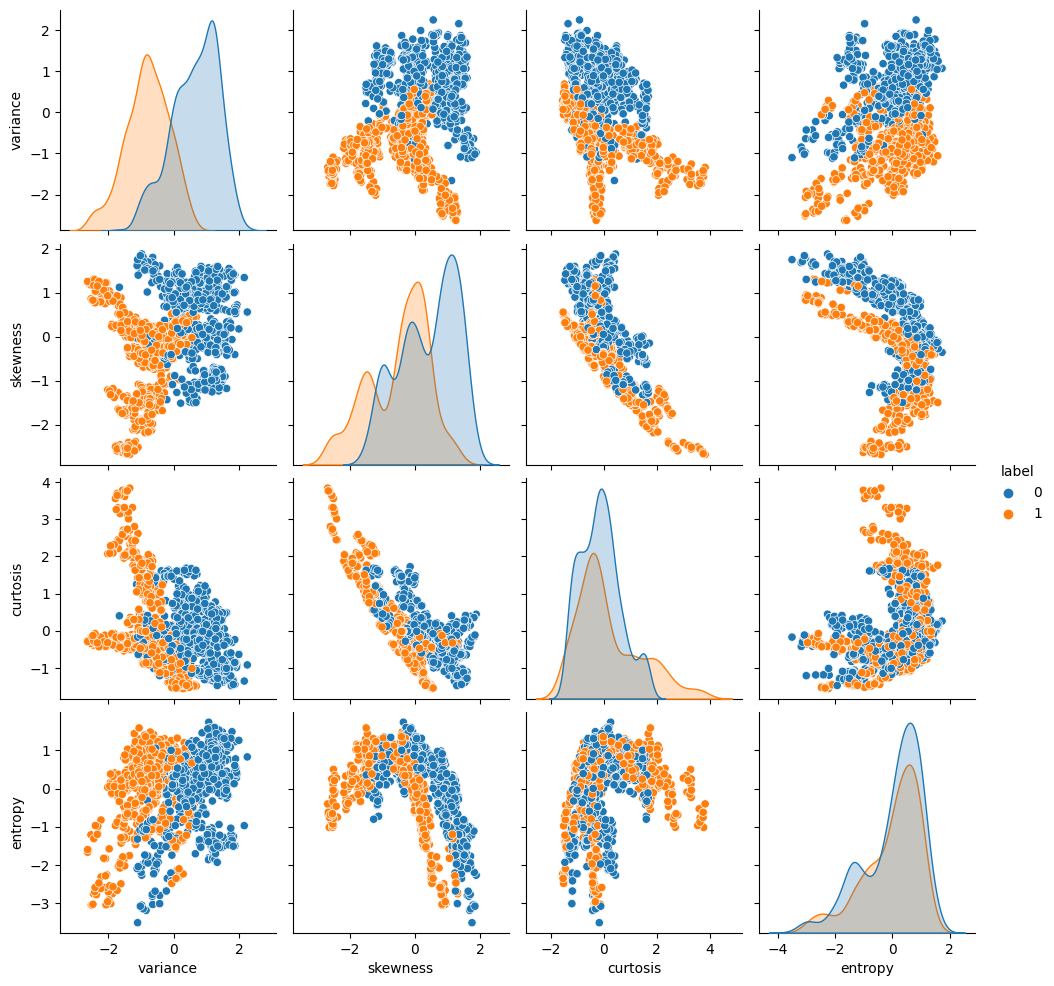

In [57]:
sns.pairplot(data, hue='label')

### ***Q2. Train an SVM classifier using Sklearn library. Analyze the performance (classification accuracy) for different values of ‘C’. (Choose at least 5 different values of C)***

In [47]:
from sklearn.svm import SVC

In [49]:
clf = SVC(C=0.5)
clf.fit(train_x, train_y)
print(clf.score(test_x, test_y))
print(clf.score(val_x, val_y))

1.0
1.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: ignored

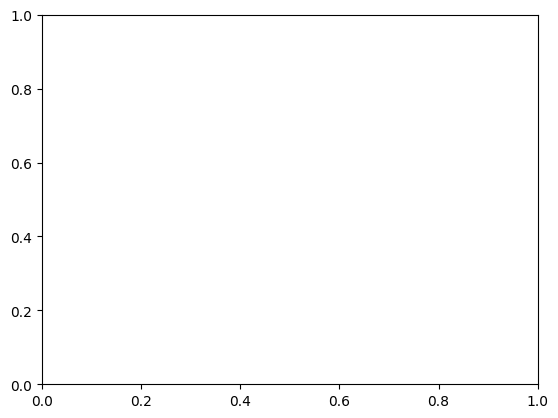

In [60]:
import matplotlib.pyplot as plt
import numpy as np

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = data_x['curtosis'], data_x['entropy']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### ***Q3. Use various types of kernels(RBF, Linear, Quadratic etc) and train the SVM model using the Sklearn library. Plot the decision boundary for different svm models trained.***

### ***Q4.***

In report
